# Customer Churn Prediction Using Artificial Neural Network (ANN)
#### by shahbaz aman 

# INDRODUCTION

Customer churn prediction is to measure why customers are leaving business.Here we looking at customerchurn in telecom business 
and build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model.

# OBJECTIVE

An E Commerce company or DTH provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to  develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners.In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.here i assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.

**DATA DICTIONARY**

#### importing libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

**Load the data**

In [2]:
df = pd.read_excel("Customer Churn Data.xlsx")
df

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
0          20000      1      4        3.0              6.0   Debit Card   
1          20001      1      0        1.0              8.0          UPI   
2          20002      1      0        1.0             30.0   Debit Card   
3          20003      1      0        3.0             15.0   Debit Card   
4          20004      1      0        1.0             12.0  Credit Card   
...          ...    ...    ...        ...              ...          ...   
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

       Gender  Service_Score Account_user_count account_segment  \
0      Female            3.0                  3           Super   
1        Male            3.0                  4    Regular Plus   
2        Male            2.0                  4    Regular Plus   
3        Male            2.0                  4           Super   
4        Male            2.0                  3    Regular Plus   
...       ...            ...                ...             ...   
11255    Male            3.0                  2           Super   
11256    Male            3.0                  5             HNI   
11257    Male            3.0                  2           Super   
11258    Male            4.0                  5           Super   
11259    Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
0                 2.0         Single             9          1.0   
1                 3.0         Single             7          1.0   
2                 3.0         Single             6          1.0   
3                 5.0         Single             8          0.0   
4                 5.0         Single             3          0.0   
...               ...            ...           ...          ...   
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
0                 11                       1                    5   159.93   
1                 15                       0                    0    120.9   
2                 14                       0                    3      NaN   
3                 23                       0                    3   134.07   
4                 11                       1                    3    129.6   
...              ...                     ...                  ...      ...   
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
0           Mobile  
1           Mobile  
2           Mobile  
3           Mobile  
4           Mobile  
...            ...  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile  

[11260 rows x 19 columns]

# DESCRIBE DATA

In [3]:
#Check the data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [4]:
#View Top rows of the datasets
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [5]:
# view bottom rows
df.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

      Gender  Service_Score Account_user_count account_segment  \
11255   Male            3.0                  2           Super   
11256   Male            3.0                  5             HNI   
11257   Male            3.0                  2           Super   
11258   Male            4.0                  5           Super   
11259   Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile

In [6]:
# Check the shape of the dataset
df.shape

(11260, 19)

In [7]:
# give columns in dataset
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [8]:
# Get the info data types column wise
df.info

<bound method DataFrame.info of        AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
0          20000      1      4        3.0              6.0   Debit Card   
1          20001      1      0        1.0              8.0          UPI   
2          20002      1      0        1.0             30.0   Debit Card   
3          20003      1      0        3.0             15.0   Debit Card   
4          20004      1      0        1.0             12.0  Credit Card   
...          ...    ...    ...        ...              ...          ...   
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

       Gender  Service_Score Account_user_count account_segment  \


In [9]:
# Check the summary of the dataset
df.describe()

AccountID         Churn     City_Tier  CC_Contacted_LY  \
count  11260.00000  11260.000000  11148.000000     11158.000000   
mean   25629.50000      0.168384      1.653929        17.867091   
std     3250.62635      0.374223      0.915015         8.853269   
min    20000.00000      0.000000      1.000000         4.000000   
25%    22814.75000      0.000000      1.000000        11.000000   
50%    25629.50000      0.000000      1.000000        16.000000   
75%    28444.25000      0.000000      3.000000        23.000000   
max    31259.00000      1.000000      3.000000       132.000000   

       Service_Score  CC_Agent_Score   Complain_ly  
count   11162.000000    11144.000000  10903.000000  
mean        2.902526        3.066493      0.285334  
std         0.725584        1.379772      0.451594  
min         0.000000        1.000000      0.000000  
25%         2.000000        2.000000      0.000000  
50%         3.000000        3.000000      0.000000  
75%         3.000000        4.000000      1.000000  
max         5.000000        5.000000      1.000000

In [10]:
df.describe(include='all').T

count  unique         top    freq       mean  \
AccountID                11260.0     NaN         NaN     NaN    25629.5   
Churn                    11260.0     NaN         NaN     NaN   0.168384   
Tenure                   11158.0    38.0         1.0  1351.0        NaN   
City_Tier                11148.0     NaN         NaN     NaN   1.653929   
CC_Contacted_LY          11158.0     NaN         NaN     NaN  17.867091   
Payment                    11151       5  Debit Card    4587        NaN   
Gender                     11152       4        Male    6328        NaN   
Service_Score            11162.0     NaN         NaN     NaN   2.902526   
Account_user_count       11148.0     7.0         4.0  4569.0        NaN   
account_segment            11163       7       Super    4062        NaN   
CC_Agent_Score           11144.0     NaN         NaN     NaN   3.066493   
Marital_Status             11048       3     Married    5860        NaN   
rev_per_month            11158.0    59.0         3.0  1746.0        NaN   
Complain_ly              10903.0     NaN         NaN     NaN   0.285334   
rev_growth_yoy           11260.0    20.0        14.0  1524.0        NaN   
coupon_used_for_payment  11260.0    20.0         1.0  4373.0        NaN   
Day_Since_CC_connect     10903.0    24.0         3.0  1816.0        NaN   
cashback                 10789.0  5693.0      155.62    10.0        NaN   
Login_device               11039       3      Mobile    7482        NaN   

                                std      min       25%      50%       75%  \
AccountID                3250.62635  20000.0  22814.75  25629.5  28444.25   
Churn                      0.374223      0.0       0.0      0.0       0.0   
Tenure                          NaN      NaN       NaN      NaN       NaN   
City_Tier                  0.915015      1.0       1.0      1.0       3.0   
CC_Contacted_LY            8.853269      4.0      11.0     16.0      23.0   
Payment                         NaN      NaN       NaN      NaN       NaN   
Gender                          NaN      NaN       NaN      NaN       NaN   
Service_Score              0.725584      0.0       2.0      3.0       3.0   
Account_user_count              NaN      NaN       NaN      NaN       NaN   
account_segment                 NaN      NaN       NaN      NaN       NaN   
CC_Agent_Score             1.379772      1.0       2.0      3.0       4.0   
Marital_Status                  NaN      NaN       NaN      NaN       NaN   
rev_per_month                   NaN      NaN       NaN      NaN       NaN   
Complain_ly                0.451594      0.0       0.0      0.0       1.0   
rev_growth_yoy                  NaN      NaN       NaN      NaN       NaN   
coupon_used_for_payment         NaN      NaN       NaN      NaN       NaN   
Day_Since_CC_connect            NaN      NaN       NaN      NaN       NaN   
cashback                        NaN      NaN       NaN      NaN       NaN   
Login_device                    NaN      NaN       NaN      NaN       NaN   

                             max  
AccountID                31259.0  
Churn                        1.0  
Tenure                       NaN  
City_Tier                    3.0  
CC_Contacted_LY            132.0  
Payment                      NaN  
Gender                       NaN  
Service_Score                5.0  
Account_user_count           NaN  
account_segment              NaN  
CC_Agent_Score               5.0  
Marital_Status               NaN  
rev_per_month                NaN  
Complain_ly                  1.0  
rev_growth_yoy               NaN  
coupon_used_for_payment      NaN  
Day_Since_CC_connect         NaN  
cashback                     NaN  
Login_device                 NaN

**here 50%=Q2 = meadian, 25% = Q1,75%=Q3, std = standard deviation**

In [11]:
df.value_counts

<bound method DataFrame.value_counts of        AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
0          20000      1      4        3.0              6.0   Debit Card   
1          20001      1      0        1.0              8.0          UPI   
2          20002      1      0        1.0             30.0   Debit Card   
3          20003      1      0        3.0             15.0   Debit Card   
4          20004      1      0        1.0             12.0  Credit Card   
...          ...    ...    ...        ...              ...          ...   
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

       Gender  Service_Score Account_user_count account_seg

In [12]:
df.fillna(0)

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
0          20000      1      4        3.0              6.0   Debit Card   
1          20001      1      0        1.0              8.0          UPI   
2          20002      1      0        1.0             30.0   Debit Card   
3          20003      1      0        3.0             15.0   Debit Card   
4          20004      1      0        1.0             12.0  Credit Card   
...          ...    ...    ...        ...              ...          ...   
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

       Gender  Service_Score Account_user_count account_segment  \
0      Female            3.0                  3           Super   
1        Male            3.0                  4    Regular Plus   
2        Male            2.0                  4    Regular Plus   
3        Male            2.0                  4           Super   
4        Male            2.0                  3    Regular Plus   
...       ...            ...                ...             ...   
11255    Male            3.0                  2           Super   
11256    Male            3.0                  5             HNI   
11257    Male            3.0                  2           Super   
11258    Male            4.0                  5           Super   
11259    Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
0                 2.0         Single             9          1.0   
1                 3.0         Single             7          1.0   
2                 3.0         Single             6          1.0   
3                 5.0         Single             8          0.0   
4                 5.0         Single             3          0.0   
...               ...            ...           ...          ...   
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
0                 11                       1                    5   159.93   
1                 15                       0                    0    120.9   
2                 14                       0                    3        0   
3                 23                       0                    3   134.07   
4                 11                       1                    3    129.6   
...              ...                     ...                  ...      ...   
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
0           Mobile  
1           Mobile  
2           Mobile  
3           Mobile  
4           Mobile  
...            ...  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile  

[11260 rows x 19 columns]

In [13]:
df

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
0          20000      1      4        3.0              6.0   Debit Card   
1          20001      1      0        1.0              8.0          UPI   
2          20002      1      0        1.0             30.0   Debit Card   
3          20003      1      0        3.0             15.0   Debit Card   
4          20004      1      0        1.0             12.0  Credit Card   
...          ...    ...    ...        ...              ...          ...   
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

       Gender  Service_Score Account_user_count account_segment  \
0      Female            3.0                  3           Super   
1        Male            3.0                  4    Regular Plus   
2        Male            2.0                  4    Regular Plus   
3        Male            2.0                  4           Super   
4        Male            2.0                  3    Regular Plus   
...       ...            ...                ...             ...   
11255    Male            3.0                  2           Super   
11256    Male            3.0                  5             HNI   
11257    Male            3.0                  2           Super   
11258    Male            4.0                  5           Super   
11259    Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
0                 2.0         Single             9          1.0   
1                 3.0         Single             7          1.0   
2                 3.0         Single             6          1.0   
3                 5.0         Single             8          0.0   
4                 5.0         Single             3          0.0   
...               ...            ...           ...          ...   
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
0                 11                       1                    5   159.93   
1                 15                       0                    0    120.9   
2                 14                       0                    3      NaN   
3                 23                       0                    3   134.07   
4                 11                       1                    3    129.6   
...              ...                     ...                  ...      ...   
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
0           Mobile  
1           Mobile  
2           Mobile  
3           Mobile  
4           Mobile  
...            ...  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile  

[11260 rows x 19 columns]

**getting uniqe counts of all nominal variable**

In [14]:
for column in df [['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

ACCOUNTID :  11260
20000    1
20010    1
20002    1
20003    1
20004    1
        ..
31254    1
31255    1
31256    1
31248    1
31259    1
Name: AccountID, Length: 11260, dtype: int64


CHURN :  2
1    1896
0    9364
Name: Churn, dtype: int64


TENURE :  38
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


CITY_TIER :  3
2.0     480
3.0    3405
1.0    7263
Name: City_Tier, dtype: int64


CC_CONTACTED_LY :  44
129.0      1
127.0      1
4.0        1
132.0      1
126.0      1
5.0        8
43.0       8
41.0      29
42.0      30
40.0      46
39.0      55
38.0      73
37.0      96
36.0     148
33.0   

In [15]:
df.nunique

<bound method DataFrame.nunique of        AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
0          20000      1      4        3.0              6.0   Debit Card   
1          20001      1      0        1.0              8.0          UPI   
2          20002      1      0        1.0             30.0   Debit Card   
3          20003      1      0        3.0             15.0   Debit Card   
4          20004      1      0        1.0             12.0  Credit Card   
...          ...    ...    ...        ...              ...          ...   
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

       Gender  Service_Score Account_user_count account_segment 

# DATA PREPROCESSING

#### check for missing values,display no.of null values per column

In [16]:
df.duplicated().sum()

0

**there is no duplicate values so we can skip further steps**

In [17]:
df.isnull()

AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
0          False  False   False      False            False    False   False   
1          False  False   False      False            False    False   False   
2          False  False   False      False            False    False   False   
3          False  False   False      False            False    False   False   
4          False  False   False      False            False    False   False   
...          ...    ...     ...        ...              ...      ...     ...   
11255      False  False   False      False            False    False   False   
11256      False  False   False      False            False    False   False   
11257      False  False   False      False            False    False   False   
11258      False  False   False      False            False    False   False   
11259      False  False   False      False            False    False   False   

       Service_Score  Account_user_count  account_segment  CC_Agent_Score  \
0              False               False            False           False   
1              False               False            False           False   
2              False               False            False           False   
3              False               False            False           False   
4              False               False            False           False   
...              ...                 ...              ...             ...   
11255          False               False            False           False   
11256          False               False            False           False   
11257          False               False            False           False   
11258          False               False            False           False   
11259          False               False            False           False   

       Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0               False          False        False           False   
1               False          False        False           False   
2               False          False        False           False   
3               False          False        False           False   
4               False          False        False           False   
...               ...            ...          ...             ...   
11255           False          False        False           False   
11256           False          False        False           False   
11257           False          False        False           False   
11258           False          False        False           False   
11259           False          False        False           False   

       coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  
0                        False                 False     False         False  
1                        False                 False     False         False  
2                        False                 False      True         False  
3                        False                 False     False         False  
4                        False                 False     False         False  
...                        ...                   ...       ...           ...  
11255                    False                 False     False         False  
11256                    False                 False     False         False  
11257                    False                 False     False         False  
11258                    False                 False     False         False  
11259                    False                 False     False         False  

[11260 rows x 19 columns]

#### Drop null values from "df" and check if there are any missing value left after dropping null values

In [18]:
df.isnull().sum()  # get null values

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [19]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()   

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count         112
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month              102
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [20]:
#Replace null values

df.replace(np.nan,'0',inplace = True)

#Check the changes now
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

**checking duplicate values**

In [21]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [22]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (11260, 19)
After (11260, 19)


In [23]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


**therefore no duplicate**

In [24]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [25]:
df

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
0          20000      1      4        3.0              6.0   Debit Card   
1          20001      1      0        1.0              8.0          UPI   
2          20002      1      0        1.0             30.0   Debit Card   
3          20003      1      0        3.0             15.0   Debit Card   
4          20004      1      0        1.0             12.0  Credit Card   
...          ...    ...    ...        ...              ...          ...   
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

       Gender  Service_Score Account_user_count account_segment  \
0      Female            3.0                  3           Super   
1        Male            3.0                  4    Regular Plus   
2        Male            2.0                  4    Regular Plus   
3        Male            2.0                  4           Super   
4        Male            2.0                  3    Regular Plus   
...       ...            ...                ...             ...   
11255    Male            3.0                  2           Super   
11256    Male            3.0                  5             HNI   
11257    Male            3.0                  2           Super   
11258    Male            4.0                  5           Super   
11259    Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
0                 2.0         Single             9          1.0   
1                 3.0         Single             7          1.0   
2                 3.0         Single             6          1.0   
3                 5.0         Single             8          0.0   
4                 5.0         Single             3          0.0   
...               ...            ...           ...          ...   
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
0                 11                       1                    5   159.93   
1                 15                       0                    0    120.9   
2                 14                       0                    3        0   
3                 23                       0                    3   134.07   
4                 11                       1                    3    129.6   
...              ...                     ...                  ...      ...   
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
0           Mobile  
1           Mobile  
2           Mobile  
3           Mobile  
4           Mobile  
...            ...  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile  

[11260 rows x 19 columns]

**converting object(string) datatypes into numerical data types(int/float)**

In [ ]:
#observing the above columns makes me realize that some columns should be float but it is an object, 
# so converting object into numerical datatypes
# some values seems to be not numbers but blank string.
# finding out such rows

In [26]:
pd.to_numeric(df.Tenure,errors='coerce').isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
11255    False
11256    False
11257    False
11258    False
11259    False
Name: Tenure, Length: 11260, dtype: bool

In [27]:
df.info()   # here we can see that almost 11 columns are object, so convert them into int or float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  object 
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  object 
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  object 
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

**converting categorical into numerical columns**

In [28]:
df

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
0          20000      1      4        3.0              6.0   Debit Card   
1          20001      1      0        1.0              8.0          UPI   
2          20002      1      0        1.0             30.0   Debit Card   
3          20003      1      0        3.0             15.0   Debit Card   
4          20004      1      0        1.0             12.0  Credit Card   
...          ...    ...    ...        ...              ...          ...   
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

       Gender  Service_Score Account_user_count account_segment  \
0      Female            3.0                  3           Super   
1        Male            3.0                  4    Regular Plus   
2        Male            2.0                  4    Regular Plus   
3        Male            2.0                  4           Super   
4        Male            2.0                  3    Regular Plus   
...       ...            ...                ...             ...   
11255    Male            3.0                  2           Super   
11256    Male            3.0                  5             HNI   
11257    Male            3.0                  2           Super   
11258    Male            4.0                  5           Super   
11259    Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
0                 2.0         Single             9          1.0   
1                 3.0         Single             7          1.0   
2                 3.0         Single             6          1.0   
3                 5.0         Single             8          0.0   
4                 5.0         Single             3          0.0   
...               ...            ...           ...          ...   
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
0                 11                       1                    5   159.93   
1                 15                       0                    0    120.9   
2                 14                       0                    3        0   
3                 23                       0                    3   134.07   
4                 11                       1                    3    129.6   
...              ...                     ...                  ...      ...   
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
0           Mobile  
1           Mobile  
2           Mobile  
3           Mobile  
4           Mobile  
...            ...  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile  

[11260 rows x 19 columns]

In [29]:
for col in df.select_dtypes(include='object').columns:
    print('count_values of {}\n is {} '.format(col,df[col].value_counts()))

count_values of Tenure
 is 1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
99     131
27     131
26     122
#      116
25     114
29     114
0      102
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64 
count_values of Payment
 is Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
0                    109
Name: Payment, dtype: int64 
count_values of Gender
 is Male      6328
Female    4178
M          376
F          270
0          108
Name: Gender, dtype: int64 
count_values of Account_user_count
 is 4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
0     112
Name: Account_user_count, dtype: int64 
count_values of acco

In [30]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  int8   
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  int8   
 6   Gender                   11260 non-null  int8   
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  int8   
 9   account_segment          11260 non-null  int8   
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  int8   
 12  rev_per_month            11260 non-null  int8   
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

**now all data types are converted into numerical data types**

In [32]:
df

AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
0          20000      1       4        3.0              6.0        3       2   
1          20001      1       0        1.0              8.0        5       4   
2          20002      1       0        1.0             30.0        3       4   
3          20003      1       0        3.0             15.0        3       4   
4          20004      1       0        1.0             12.0        2       4   
...          ...    ...     ...        ...              ...      ...     ...   
11255      31255      0      10        1.0             34.0        2       4   
11256      31256      0      13        1.0             19.0        2       4   
11257      31257      0       1        1.0             14.0        3       4   
11258      31258      0      23        3.0             11.0        2       4   
11259      31259      0       8        1.0             22.0        2       4   

       Service_Score  Account_user_count  account_segment  CC_Agent_Score  \
0                3.0                   2                5             2.0   
1                3.0                   3                4             3.0   
2                2.0                   3                4             3.0   
3                2.0                   3                5             5.0   
4                2.0                   2                4             5.0   
...              ...                 ...              ...             ...   
11255            3.0                   1                5             1.0   
11256            3.0                   4                1             5.0   
11257            3.0                   1                5             4.0   
11258            4.0                   4                5             4.0   
11259            3.0                   1                5             3.0   

       Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0                   3              8          1.0               1   
1                   3              6          1.0               5   
2                   3              5          1.0               4   
3                   3              7          0.0              13   
4                   3              2          0.0               1   
...               ...            ...          ...             ...   
11255               2              8          0.0               9   
11256               2              6          0.0               6   
11257               2              6          1.0              12   
11258               2              6          0.0               6   
11259               2              4          0.0               3   

       coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  
0                            1                     5      2222             3  
1                            0                     0       109             3  
2                            0                     3      5693             3  
3                            0                     3       748             3  
4                            1                     3       552             3  
...                        ...                   ...       ...           ...  
11255                        1                     4      1810             2  
11256                        1                     8      4481             3  
11257                        1                     4      3680             3  
11258                        2                     9      3244             2  
11259                        2                     3      3006             3  

[11260 rows x 19 columns]

In [33]:
df.shape

(11260, 19)

In [34]:
df.iloc[488].Tenure

7.0

In [35]:
df[df.Tenure!=' '].shape

(11260, 19)

# Data Visualization

**box plot**

<Axes: >

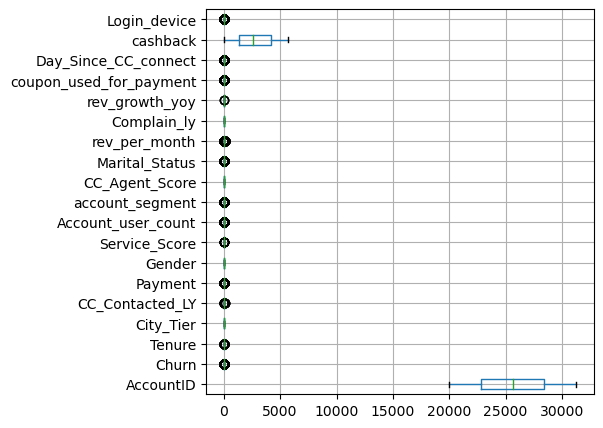

In [36]:
# construct box plot for continuous variables
plt.figure(figsize=(5,5))
df[['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device']].boxplot(vert=0)

**hist plot**

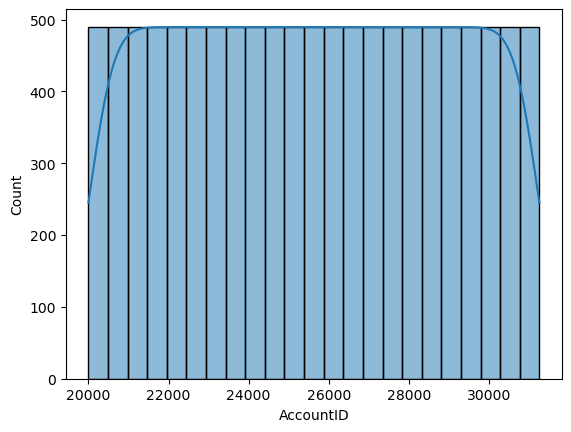

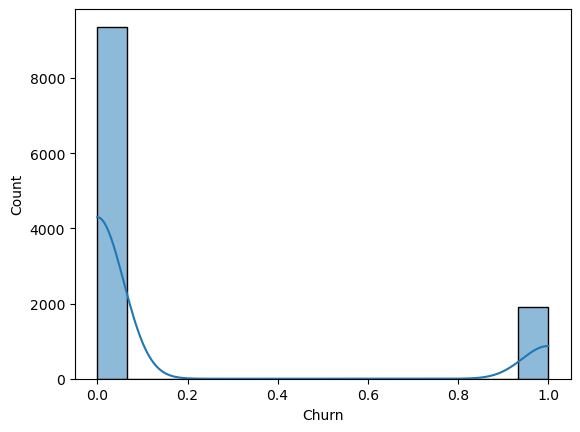

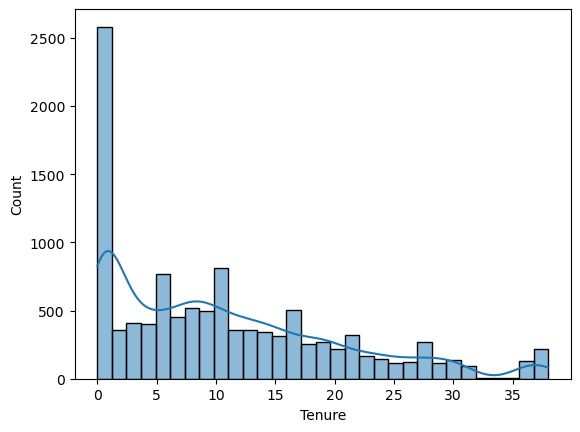

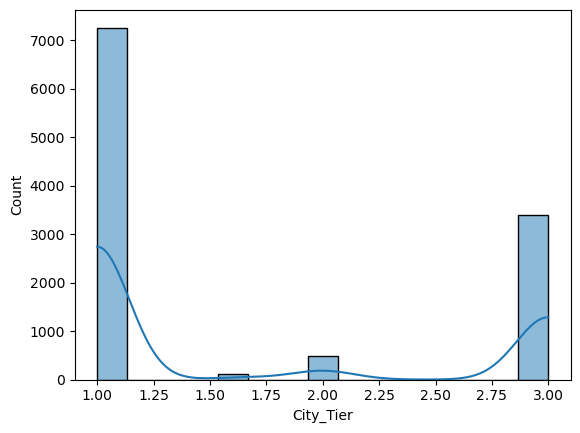

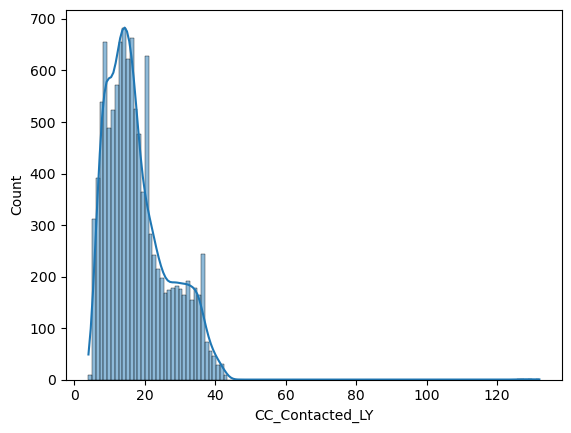

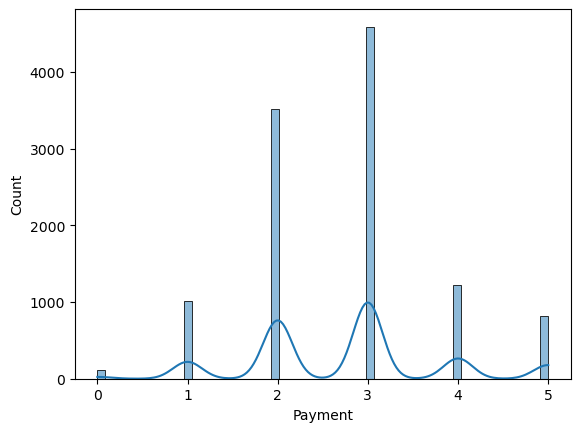

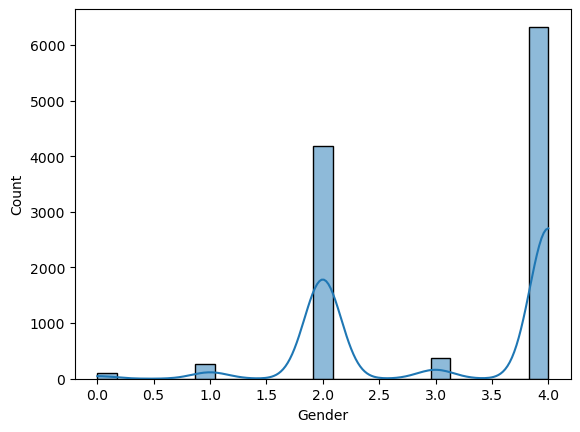

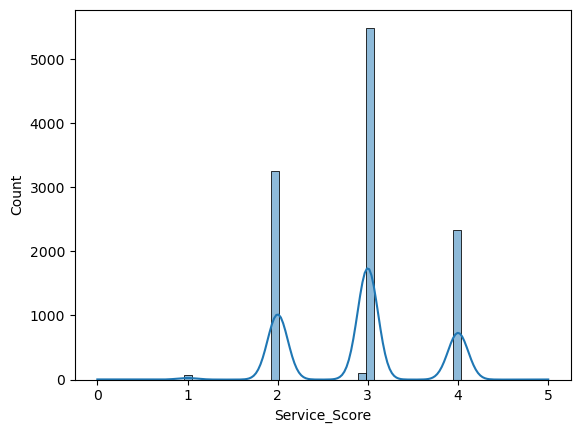

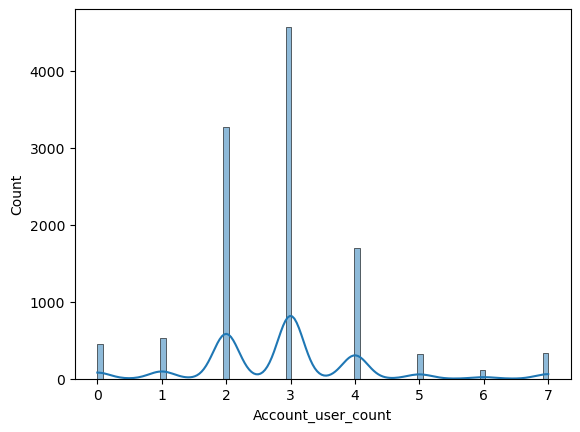

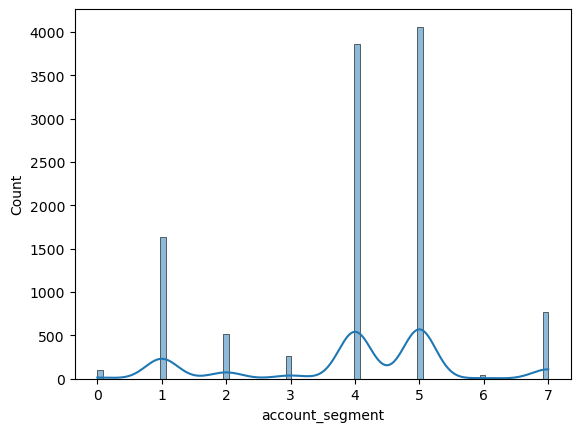

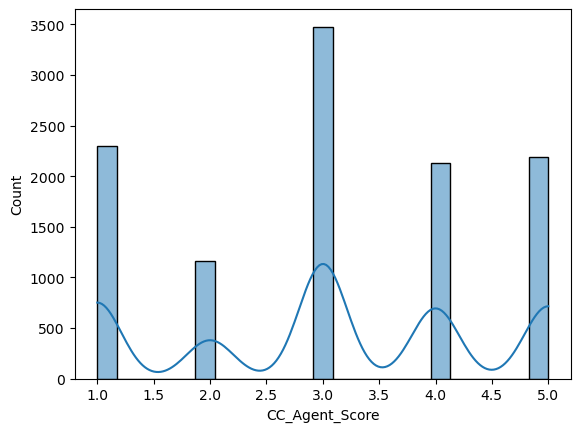

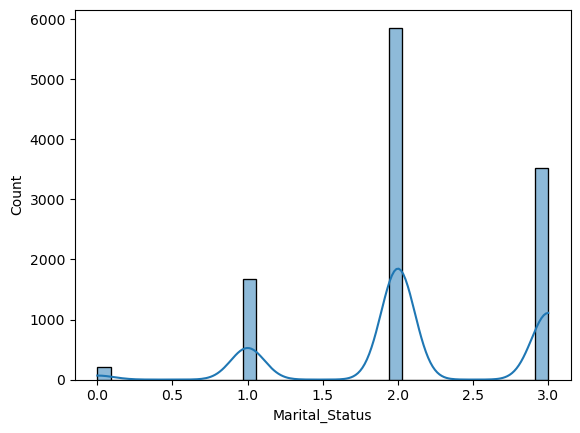

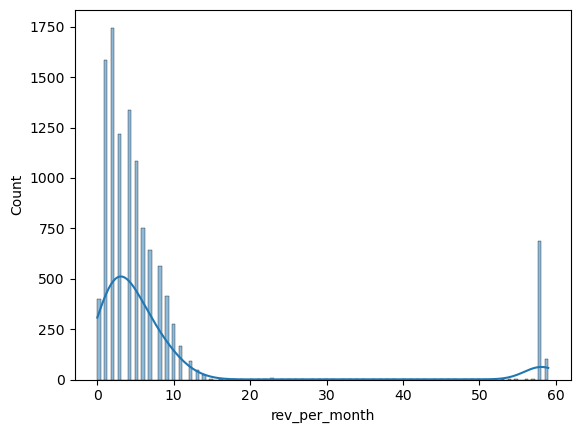

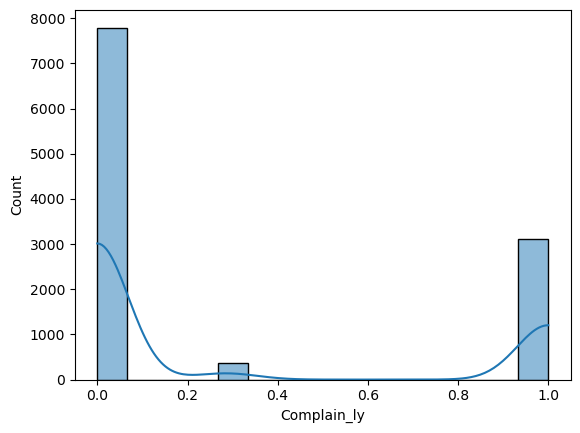

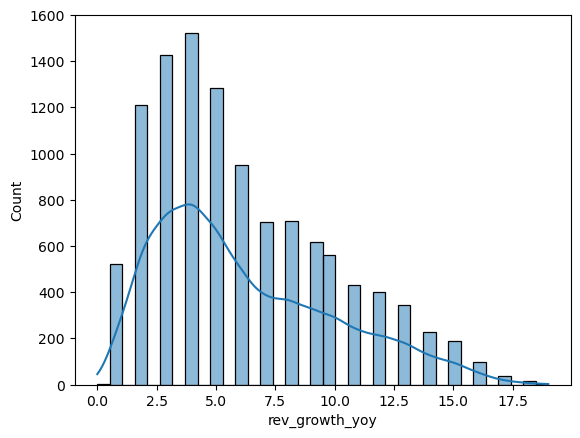

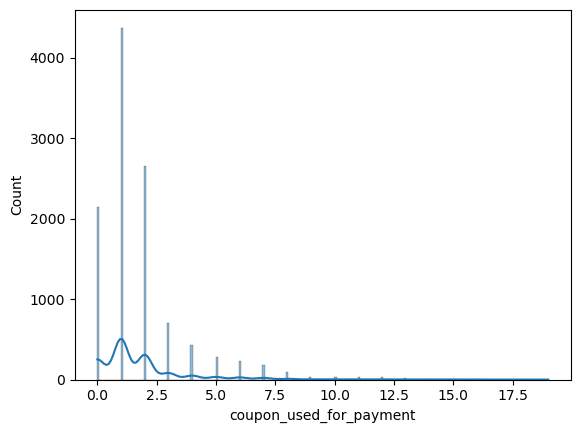

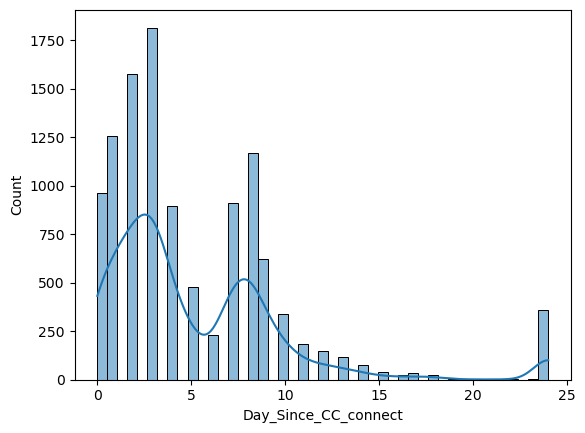

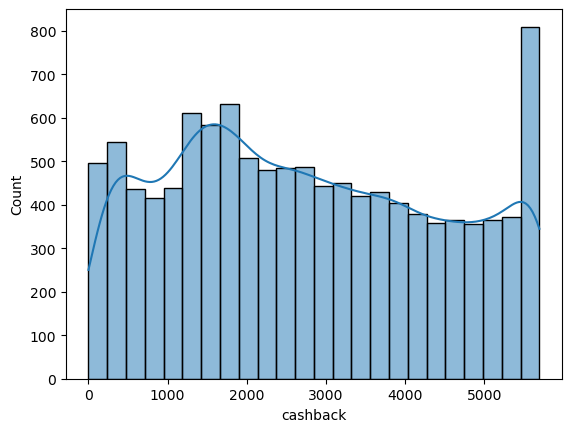

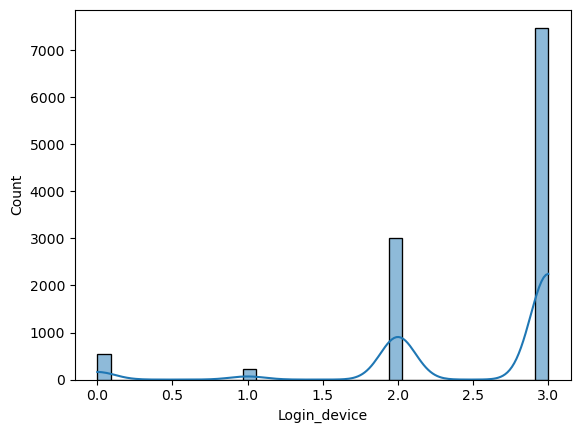

In [37]:
for col in df.select_dtypes(exclude='object'):
    sns.histplot(x = df[col],kde=True)
    plt.show()

**cat plot**

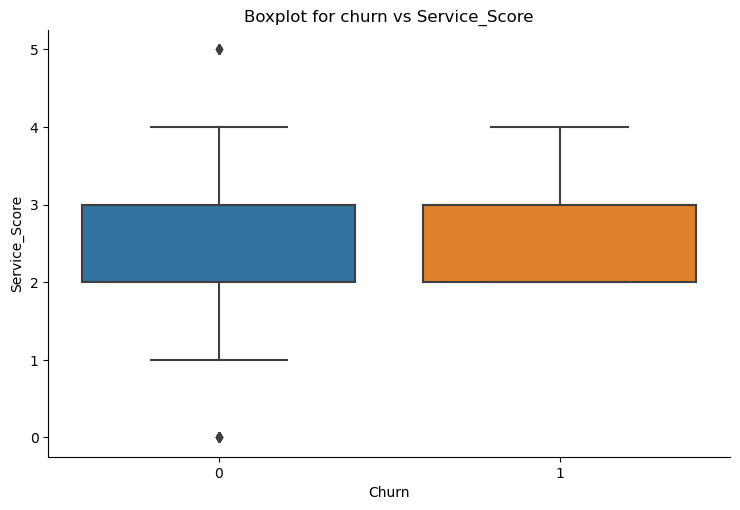

In [38]:
sns.catplot(x="Churn", y="Service_Score", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for churn vs Service_Score")
plt.show()

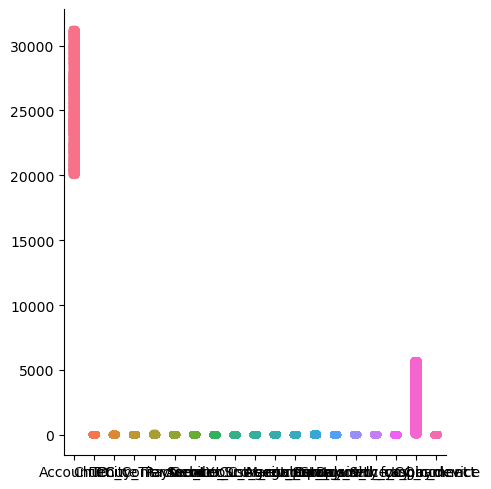

In [39]:
sns.catplot(df)

**count plot**

<Axes: ylabel='count'>

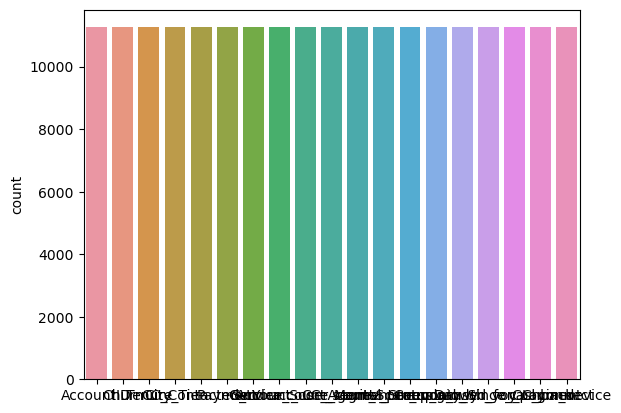

In [40]:
sns.countplot(df)

**pair plot**

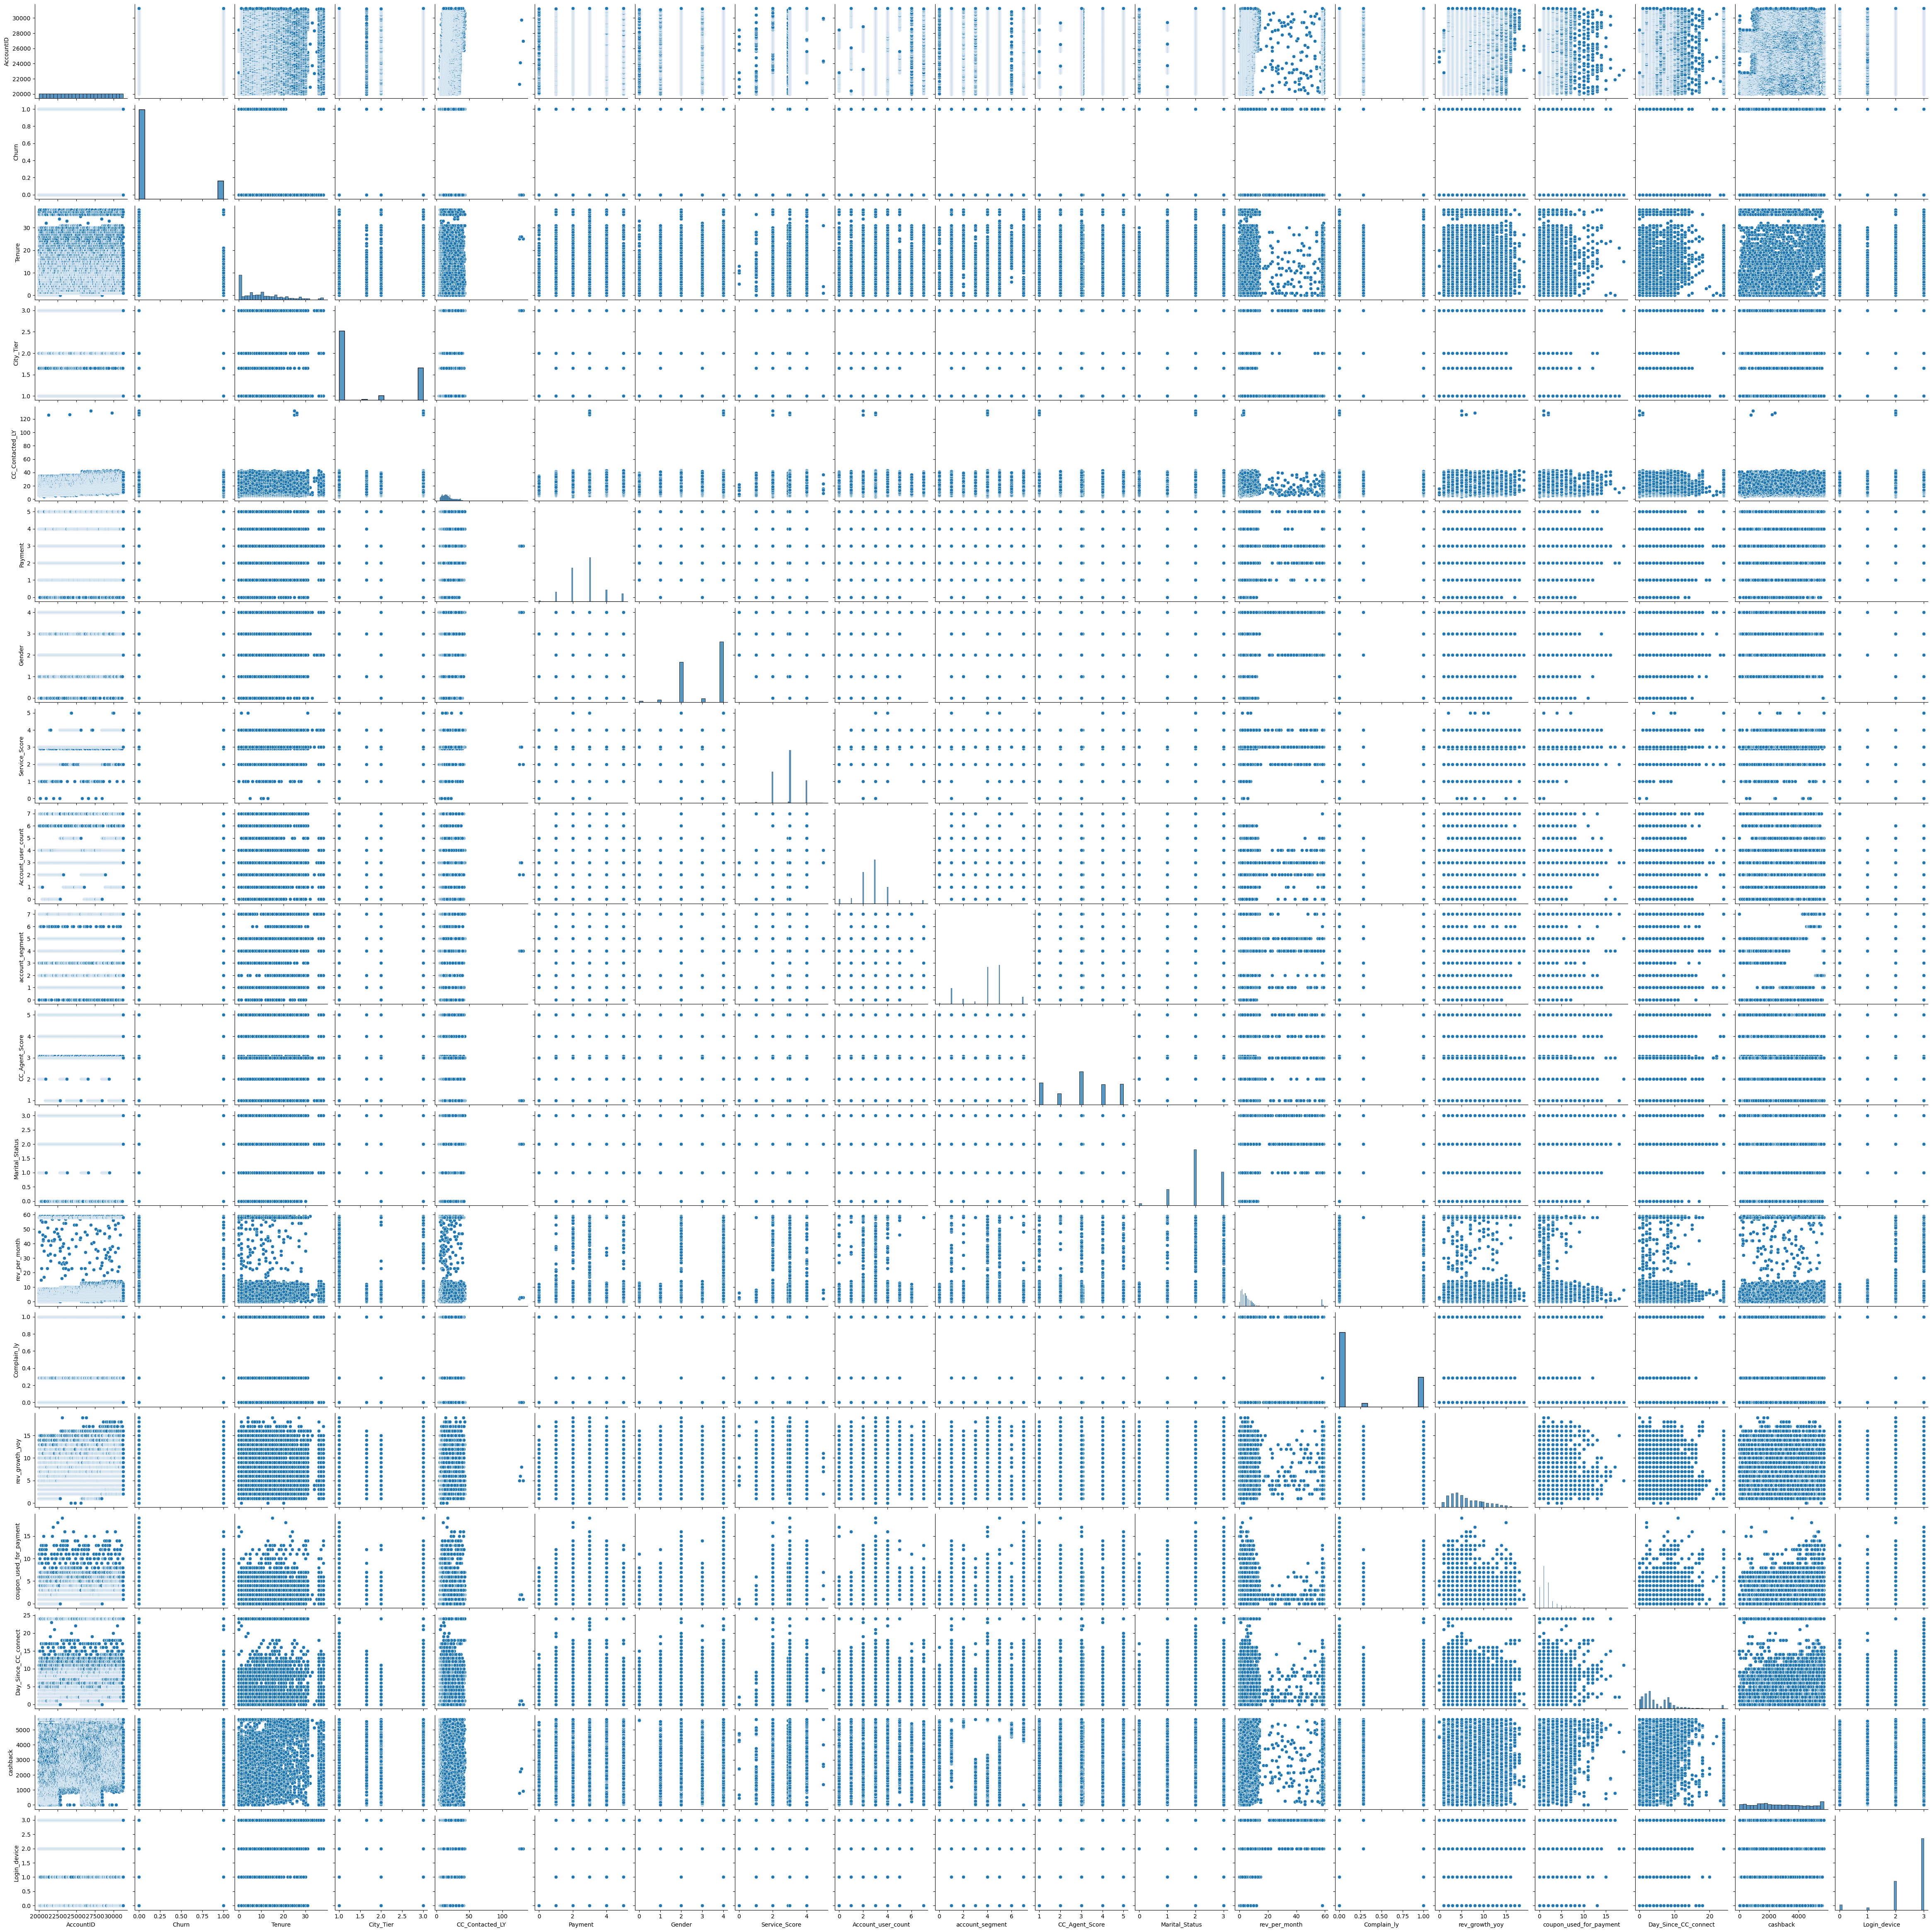

In [41]:
sns.pairplot(df)

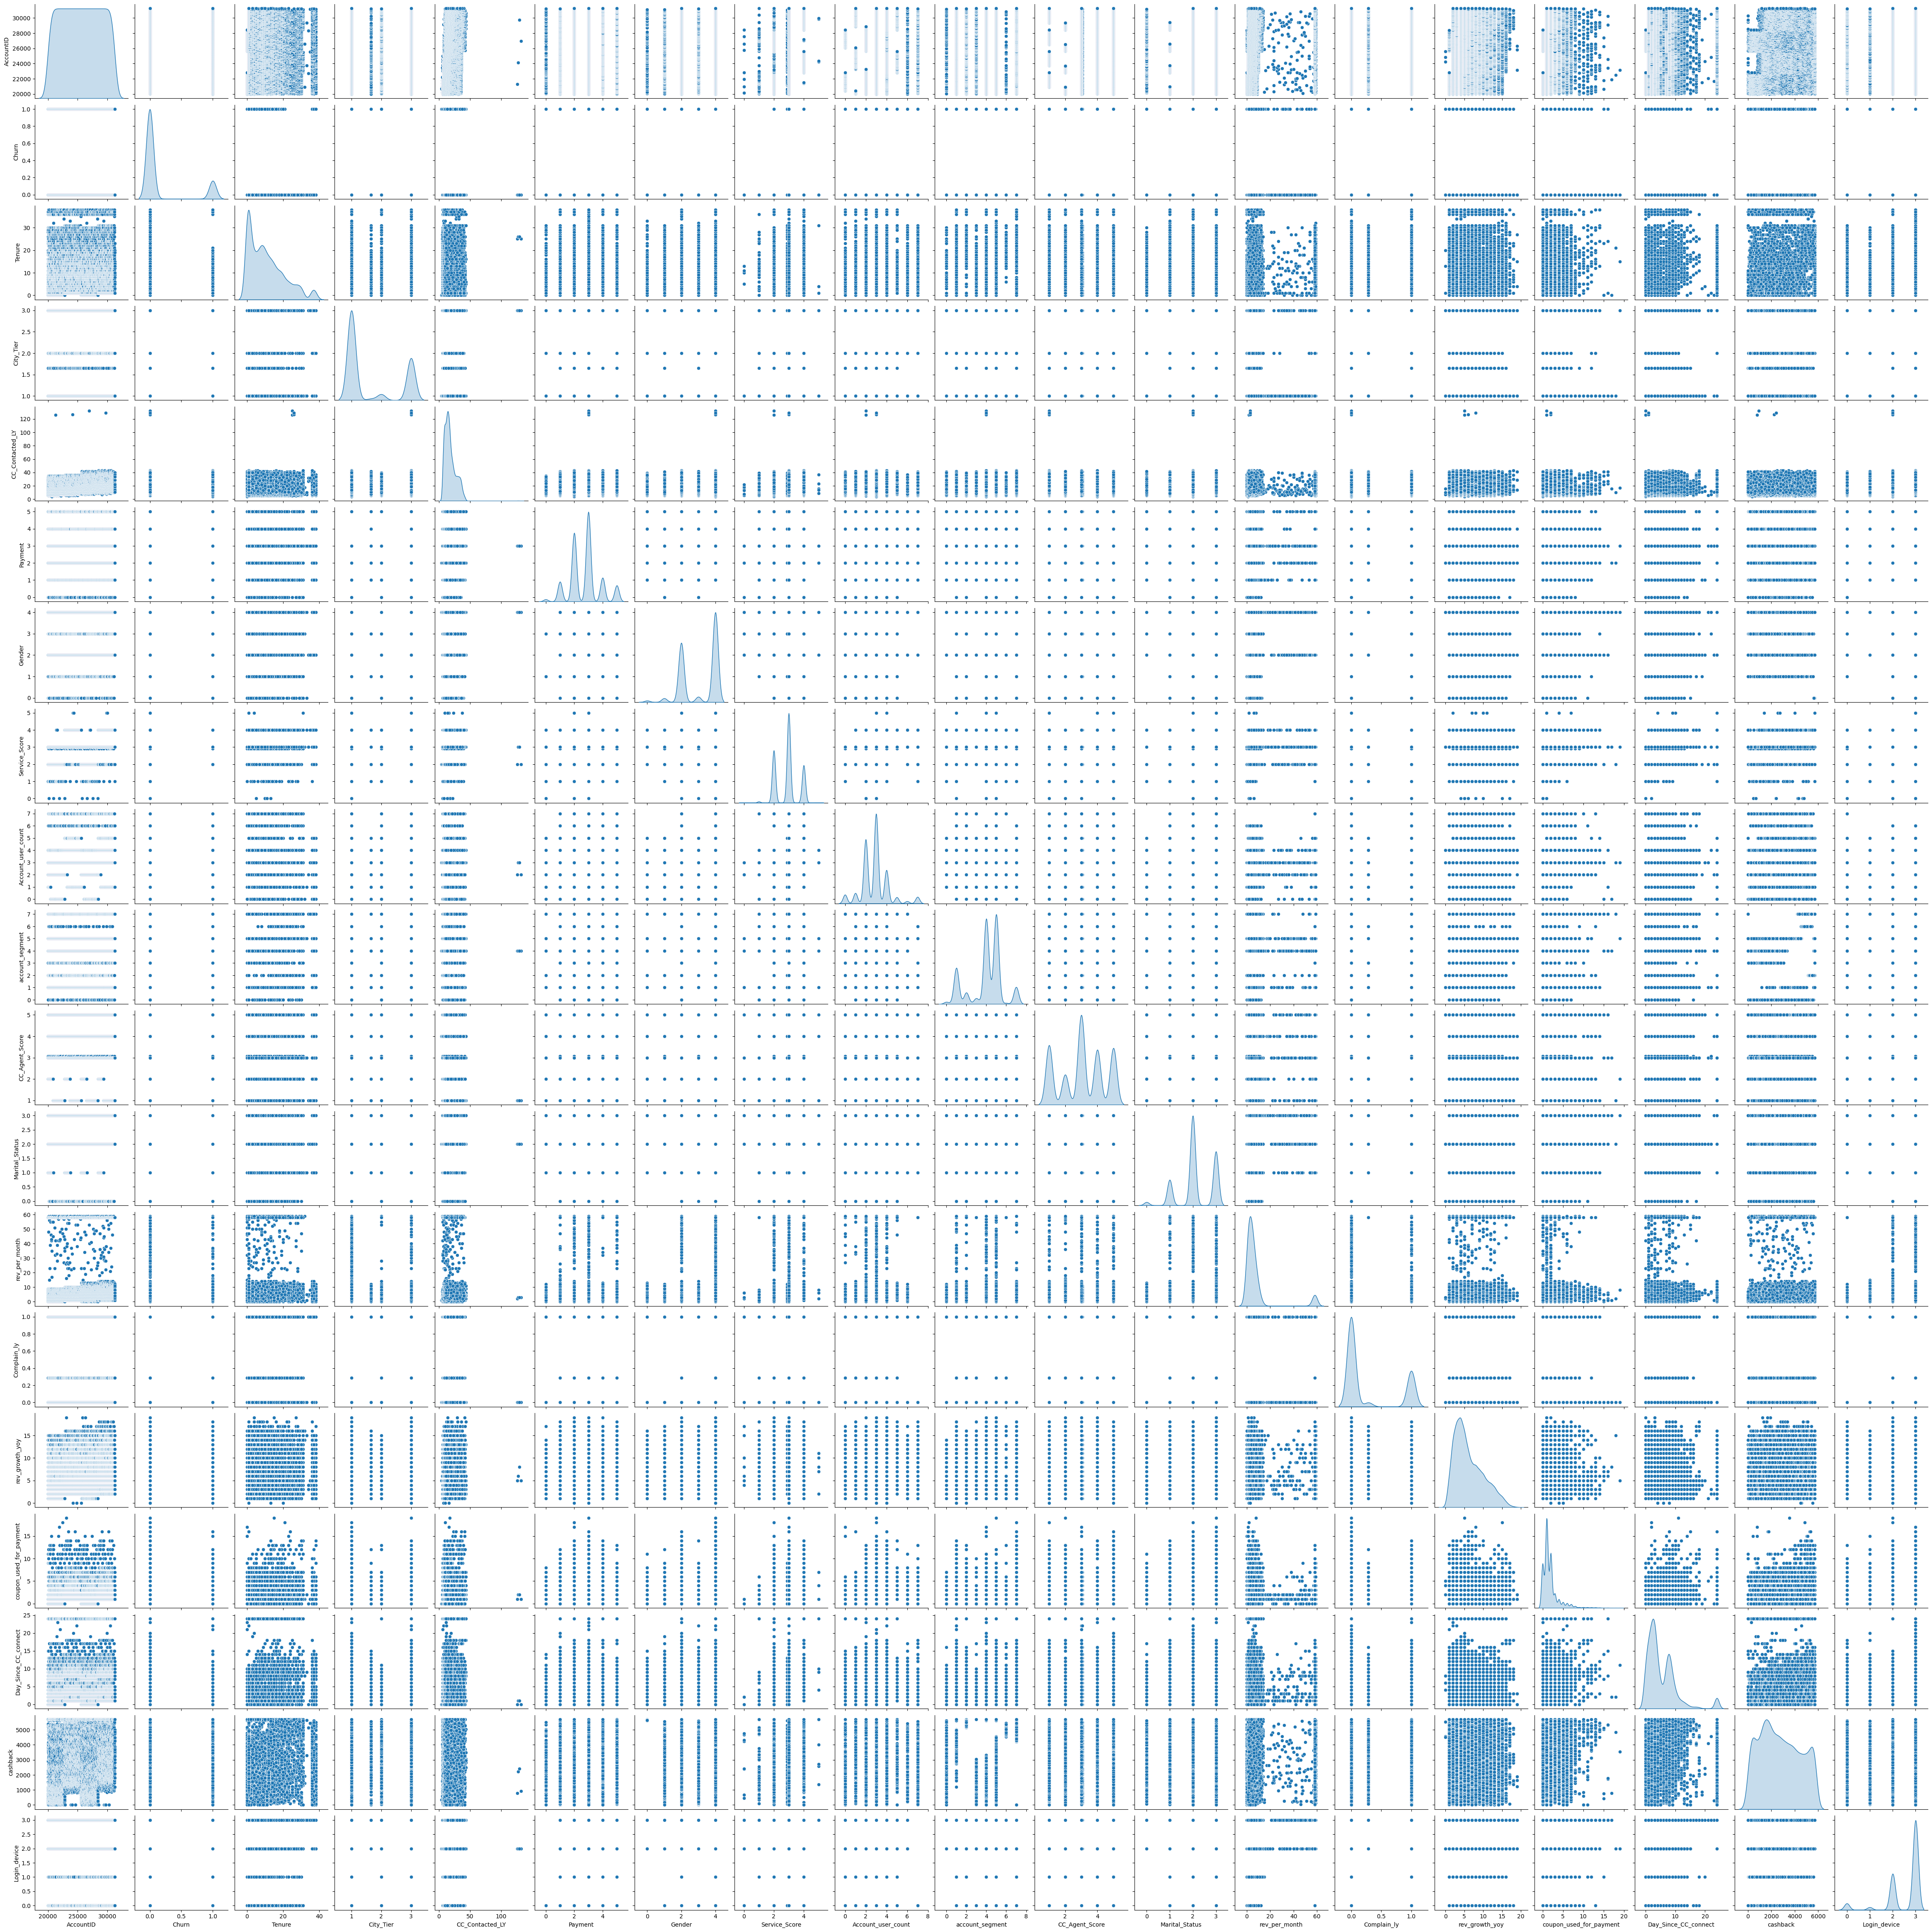

In [42]:
df_attr = (df)
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

**heat map**

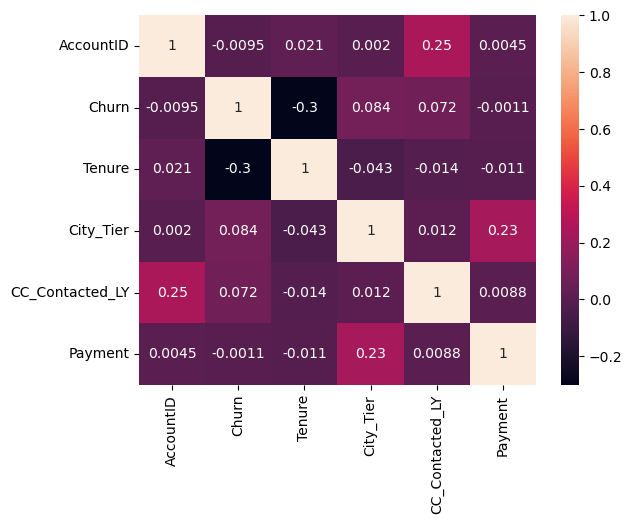

In [43]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

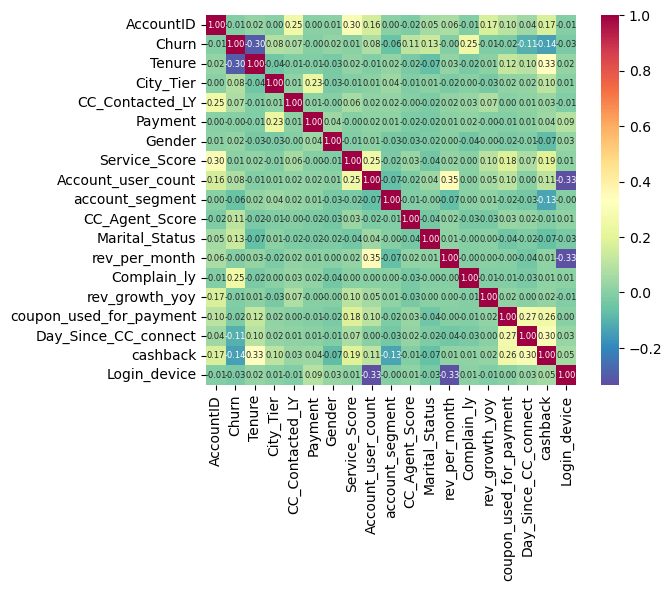

In [44]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size':6}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

In [ ]:
#corrmat = df.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(10,10))
#sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='Spectral_r')

# DATA PREPAIRING

In [45]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]
y = df.iloc[:, 8].values

In [46]:
X.head()

AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
0      20000      1       4        3.0              6.0        3       2   
1      20001      1       0        1.0              8.0        5       4   
2      20002      1       0        1.0             30.0        3       4   
3      20003      1       0        3.0             15.0        3       4   
4      20004      1       0        1.0             12.0        2       4   

   Service_Score  Account_user_count  account_segment  CC_Agent_Score  \
0            3.0                   2                5             2.0   
1            3.0                   3                4             3.0   
2            2.0                   3                4             3.0   
3            2.0                   3                5             5.0   
4            2.0                   2                4             5.0   

   Marital_Status  
0               3  
1               3  
2               3  
3               3  
4               3

In [47]:
y

array([2, 3, 3, ..., 1, 4, 1], dtype=int8)

**splitting the dataset into Training and testing dataset**

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

**standardizing the dataset**

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
X_train

array([[-0.09815828, -0.44697527, -0.08322004, ..., -1.83077201,
         1.41289433, -0.17151468],
       [ 1.70261053, -0.44697527,  0.54113822, ...,  0.61986983,
        -0.04895414,  1.21912818],
       [ 1.28475597, -0.44697527, -0.70757831, ...,  0.61986983,
        -1.51080262,  1.21912818],
       ...,
       [-0.08064525, -0.44697527, -1.01975744, ...,  0.00720937,
         1.41289433, -0.17151468],
       [-1.47246964,  2.23726023, -1.12381715, ...,  0.61986983,
        -0.04895414, -1.56215754],
       [ 0.49697723, -0.44697527,  0.43707851, ...,  1.84519076,
         0.6819701 , -0.17151468]])

**feature importance**

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [52]:
print(model.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**random forset classification**

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
y_pred = rf.predict(X_test)

In [55]:
y_pred[:10]

array([2, 2, 3, 4, 3, 2, 4, 3, 3, 5], dtype=int8)

**Accuracy**

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 76   0   0   0   0   0   0   0]
 [  2 113   0   0   0   0   0   0]
 [  0   2 659   0   0   0   0   0]
 [  0   0   0 930   0   0   0   0]
 [  0   0   0   0 315   0   0   0]
 [  0   0   0   0   0  66   0   0]
 [  0   0   0   0   0   0  15  10]
 [  0   0   0   0   0   0   1  63]]
0.9933392539964476


**Precision for customers who did not churn**

In [57]:
round(0.9951154529307282)

1

# CONCLUSION

In conclusion, the churn customer project implemented in Python offers valuable insights and predictive power to businesses aiming to reduce customer attrition. By analyzing historical data and utilizing machine learning techniques, the project provides a comprehensive understanding of customer behavior and identifies potential churners.

Throughout the project, we explored various data preprocessing techniques, including data cleaning, feature engineering, and scaling, to ensure accurate and meaningful predictions. By leveraging classification algorithms such as logistic regression, decision trees, random forests, or neural networks, we constructed predictive models capable of identifying customers at risk of churning.Additionally, feature importance analysis shed light on the factors contributing significantly to customer churn. This knowledge empowers organizations to address underlying issues and develop targeted strategies, such as personalized retention offers or proactive customer support, to mitigate churn risks.The project's successful implementation demonstrates the power of data-driven approaches in reducing customer churn and improving business outcomes.In this project we got an accuracy by predicting the dataset as "0.9951154529307282".


project done by shahbaz aman,  github = https://github.com/SHAHBAZAMAN